# 题目
给定两个大小分别为 m 和 n 的正序（从小到大）数组 nums1 和 nums2。请你找出并返回这两个正序数组的 中位数 。

算法的时间复杂度应该为 O(log (m+n)) 。


示例 1：

输入：nums1 = [1,3], nums2 = [2]
输出：2.00000
解释：合并数组 = [1,2,3] ，中位数 2
示例 2：

输入：nums1 = [1,2], nums2 = [3,4]
输出：2.50000
解释：合并数组 = [1,2,3,4] ，中位数 (2 + 3) / 2 = 2.5


# 算法思想

<font color=red size=5> 核心：二分查找 </font>   
思路与算法：

方法一：二分查找
给定两个有序数组，要求找到两个有序数组的中位数，最直观的思路有以下两种：

使用归并的方式，合并两个有序数组，得到一个大的有序数组。大的有序数组的中间位置的元素，即为中位数。

不需要合并两个有序数组，只要找到中位数的位置即可。由于两个数组的长度已知，因此中位数对应的两个数组的下标之和也是已知的。维护两个指针，初始时分别指向两个数组的下标 00 的位置，每次将指向较小值的指针后移一位（如果一个指针已经到达数组末尾，则只需要移动另一个数组的指针），直到到达中位数的位置。

假设两个有序数组的长度分别为 m 和 n，上述两种思路的复杂度如何？

第一种思路的时间复杂度是 $O(m+n)$，空间复杂度是 $O(m+n)$。第二种思路虽然可以将空间复杂度降到 O(1)，但是时间复杂度仍是 $O(m+n)$。

如何把时间复杂度降低到 $O(log(m+n)$ 呢？如果对时间复杂度的要求有 $log$，通常都需要用到二分查找，这道题也可以通过二分查找实现。

根据中位数的定义，当 m+n 是奇数时，中位数是两个有序数组中的第 (m+n)/2 个元素，当 m+n 是偶数时，中位数是两个有序数组中的第 (m+n)/2 个元素和第 (m+n)/2+1 个元素的平均值。因此，这道题可以转化成寻找两个有序数组中的第 k 小的数，其中 k 为 (m+n)/2 或 (m+n)/2+1。

$
假设两个有序数组分别是 \text{A} 和 \text{B}。要找到第 k 个元素，我们可以比较 \text{A}[k/2-1] 和 \text{B}[k/2-1]，其中 // 表示整数除法。由于 \text{A}[k/2-1] 和 \text{B}[k/2-1] 的前面分别有 \text{A}[0\,..\,k/2-2] 和 \text{B}[0\,..\,k/2-2]，即 k/2-1 个元素，对于 \text{A}[k/2-1] 和 \text{B}[k/2-1] 中的较小值，最多只会有 \leq k-2(k/2−1)+(k/2−1)≤k−2 个元素比它小，那么它就不能是第 k 小的数了。
$

因此我们可以归纳出三种情况：

- 如果 A[k/2-1] < B[k/2−1]，则比 A[k/2−1] 小的数最多只有 A 的前 k/2−1 个数和 B 的前 k/2−1 个数，即比 }A[k/2−1] 小的数最多只有 k−2 个，因此 A[k/2−1] 不可能是第 k 个数，A[0] 到 A[k/2−1] 也都不可能是第 k 个数，可以全部排除。

- 如果 A[k/2-1] > B[k/2−1]，则可以排除 B[0] 到 B[k/2−1]。

- 如果 A[k/2-1] = B[k/2−1]，则可以归入第一种情况处理。
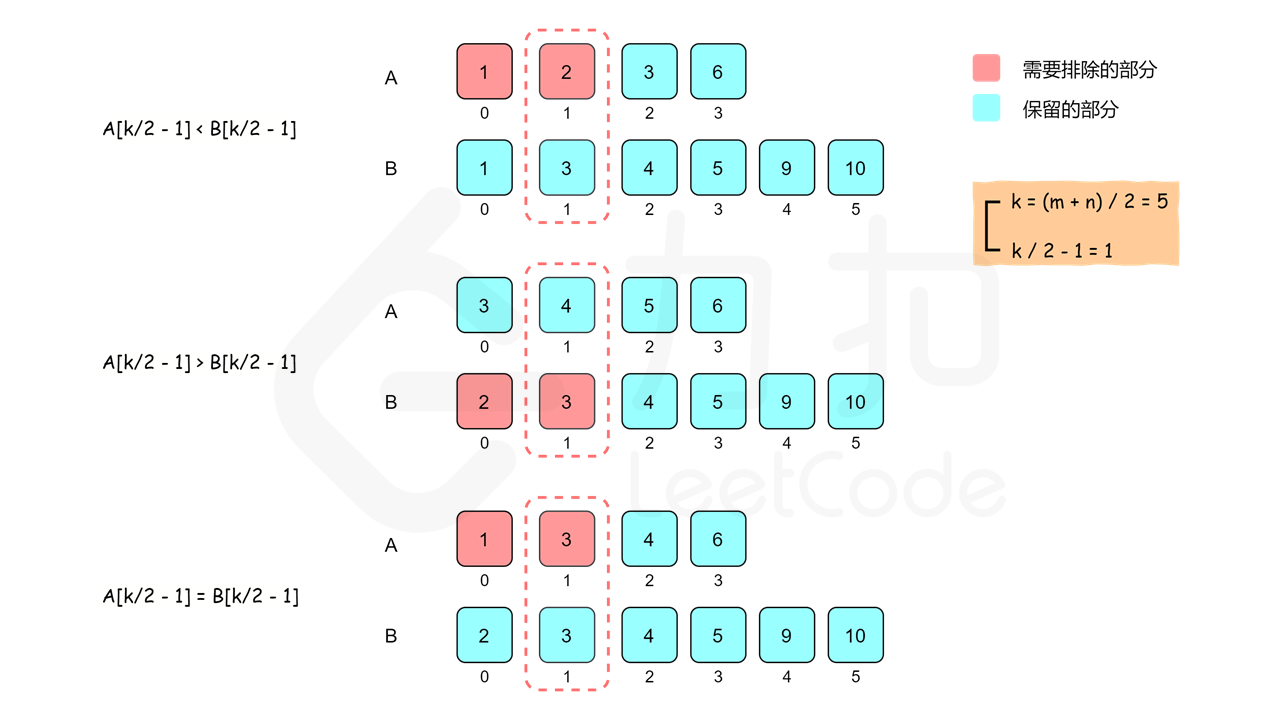

可以看到，比较 A[k/2−1] 和 B[k/2−1] 之后，可以排除 k/2 个不可能是第 k 小的数，查找范围缩小了一半。同时，我们将在排除后的新数组上继续进行二分查找，并且根据我们排除数的个数，减少 k 的值，这是因为我们排除的数都不大于第 k 小的数。

有以下三种情况需要特殊处理：

- 如果 A[k/2−1] 或者 B[k/2−1] 越界，那么我们可以选取对应数组中的最后一个元素。在这种情况下，**我们必须根据排除数的个数减少 k 的值，而不能直接将 k 减去k/2。**

- 如果一个数组为空，说明该数组中的所有元素都被排除，我们可以直接返回另一个数组中第 k 小的元素。

- 如果 k=1，我们只要返回两个数组首元素的最小值即可。

用一个例子说明上述算法。假设两个有序数组如下：


A: 1 3 4 9
B: 1 2 3 4 5 6 7 8 9
两个有序数组的长度分别是 44 和 99，长度之和是 1313，中位数是两个有序数组中的第 77 个元素，因此需要找到第 k=7k=7 个元素。

比较两个有序数组中下标为 k/2-1=2k/2−1=2 的数，即 A[2] 和 B[2]，如下面所示：


A: 1 3 4 9
     ↑
B: 1 2 3 4 5 6 7 8 9
     ↑
由于 A[2] > B[2]，因此排除 B[0] 到 B[2]，即数组 B 的下标偏移（offset）变为 33，同时更新 k 的值：k=k-k/2=4。

下一步寻找，比较两个有序数组中下标为 k/2−1=1 的数，即 A[1] 和 B[4]，如下面所示，其中方括号部分表示已经被排除的数。


A: 1 3 4 9
    ↑
B: [1 2 3] 4 5 6 7 8 9
         ↑
由于 A[1] < B[4]，因此排除 A[0] 到 A[1]，即数组 A 的下标偏移变为 2，同时更新 k 的值：k−k/2=2。

下一步寻找，比较两个有序数组中下标为 k/2−1=0 的数，即比较 A[2] 和 B[3]，如下面所示，其中方括号部分表示已经被排除的数。


A: [1 3] 4 9
       ↑
B: [1 2 3] 4 5 6 7 8 9
        ↑
由于 A[2]=B[3]，根据之前的规则，排除 }A 中的元素，因此排除 A[2]，即数组 A 的下标偏移变为 3，同时更新k 的值： k=k−k/2=1。

由于 k 的值变成 1，因此比较两个有序数组中的未排除下标范围内的第一个数，其中较小的数即为第 k 个数，由于 A[3] > B[3]，因此第 k 个数是 B[3]=4。


A: [1 3 4] 9
        ↑
B: [1 2 3] 4 5 6 7 8 9
        ↑


# 代码实现

In [ ]:
# 调用内置函数简单处理：
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        for i in nums2:
            nums1.append(i)
        nums = sorted(nums1)
        n = len(nums)
        if n%2 != 0:
            return nums[n//2]
        else:
            return (nums[n//2] + nums[n//2-1])/2

In [ ]:
# 二分法
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        def getKthElement(k):
            """
            - 主要思路：要找到第 k (k>1) 小的元素，那么就取 pivot1 = nums1[k/2-1] 和 pivot2 = nums2[k/2-1] 进行比较
            - 这里的 "/" 表示整除
            - nums1 中小于等于 pivot1 的元素有 nums1[0 .. k/2-2] 共计 k/2-1 个
            - nums2 中小于等于 pivot2 的元素有 nums2[0 .. k/2-2] 共计 k/2-1 个
            - 取 pivot = min(pivot1, pivot2)，两个数组中小于等于 pivot 的元素共计不会超过 (k/2-1) + (k/2-1) <= k-2 个
            - 这样 pivot 本身最大也只能是第 k-1 小的元素
            - 如果 pivot = pivot1，那么 nums1[0 .. k/2-1] 都不可能是第 k 小的元素。把这些元素全部 "删除"，剩下的作为新的 nums1 数组
            - 如果 pivot = pivot2，那么 nums2[0 .. k/2-1] 都不可能是第 k 小的元素。把这些元素全部 "删除"，剩下的作为新的 nums2 数组
            - 由于我们 "删除" 了一些元素（这些元素都比第 k 小的元素要小），因此需要修改 k 的值，减去删除的数的个数
            """
            
            index1, index2 = 0, 0
            while True:
                # 特殊情况
                if index1 == m:
                    return nums2[index2 + k - 1]
                if index2 == n:
                    return nums1[index1 + k - 1]
                if k == 1:
                    return min(nums1[index1], nums2[index2])

                # 正常情况
                newIndex1 = min(index1 + k // 2 - 1, m - 1)
                newIndex2 = min(index2 + k // 2 - 1, n - 1)
                pivot1, pivot2 = nums1[newIndex1], nums2[newIndex2]
                if pivot1 <= pivot2:
                    k -= newIndex1 - index1 + 1
                    index1 = newIndex1 + 1
                else:
                    k -= newIndex2 - index2 + 1
                    index2 = newIndex2 + 1
        
        m, n = len(nums1), len(nums2)
        totalLength = m + n
        if totalLength % 2 == 1:
            return getKthElement((totalLength + 1) // 2)
        else:
            return (getKthElement(totalLength // 2) + getKthElement(totalLength // 2 + 1)) / 2
